In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correct number of pieces on board
0000000000000100000001010000000101000000010100000000000011000000000000001110000000000000000000111110


Text(0.5, 1.0, 'Battleship Board')

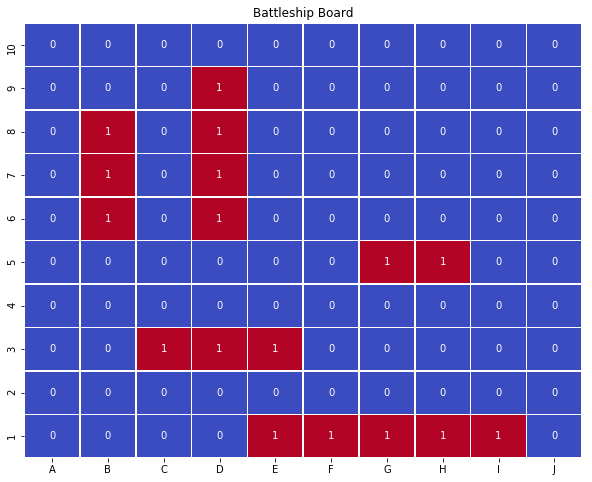

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

In [3]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
5,6,1001011010100111011011011010110100100010011110...,1,Random,0.59,0,True
2,3,0000110000100000110110100111100101001001010101...,1,Random,0.57,0,True
9,10,0110000111100111011011000110101101000011000101...,1,Random,0.52,0,False
6,7,1101000000010011110101110000111111111100111111...,1,Random,0.50,0,False
7,8,1101100011100101010110101011101000110100111110...,1,Random,0.50,0,False
0,1,1100110111110001110110101010101101111100000011...,1,Random,0.49,0,False
1,2,1100110010110100001010111010010011110010100111...,1,Random,0.49,0,False
4,5,1001110011000111111111110111001100010100001110...,1,Random,0.49,0,False
8,9,0110000010100011110011100000010000111010010011...,1,Random,0.47,0,False
3,4,1101111010111100001101101101011010110000010110...,1,Random,0.46,0,False


In [ ]:
gene_pool.describe()

In [4]:
# select elites with elite rate
next_generation = ga.select_elites(gene_pool)

# determine number of mutants in generation
mutant_rate = 0.20
n_mutants = int(mutant_rate * generation_size)

# add mutants to generation
bit_flip_rate = 0.05
next_generation = ga.create_mutants(next_generation, n_mutants, bit_flip_rate)

# compare fitness
next_generation['Fitness'] = next_generation.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)
next_generation

2


,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
0,11,1001011010100111011011011010110100100010011110...,2,Elitism,0.59,6,False
1,12,0000110000100000110110100111100101001001010101...,2,Elitism,0.57,3,False
2,13,0000111000100000110110100111100101001011010101...,2,Mutation,0.54,12,False
3,14,1001011010100111011111111010110110100010111110...,2,Mutation,0.54,11,False


In [6]:
print(next_generation['Chromosome'][1])
print(next_generation['Chromosome'][2])

0000110000100000110110100111100101001001010101100001001010001101000101000001101101000100010100000000
0000111000100000110110100111100101001011010101100001001010001101000101000001101101101100010000000000


In [ ]:
gene_pool = gene_pool.append(next_generation)
gene_pool

In [ ]:
# terminate

In [ ]:
# heuristics